In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("placement.csv")

In [3]:
df.shape

(1000, 3)

In [4]:
df.sample(5)

,cgpa,placement_exam_marks,placed
380,7.12,31.0,1
218,6.62,52.0,0
811,8.04,14.0,0
845,5.98,36.0,0
475,7.38,10.0,0


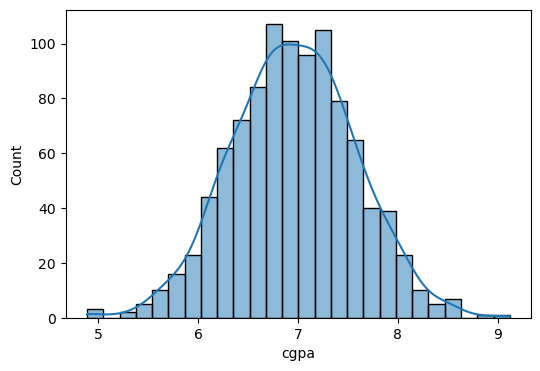

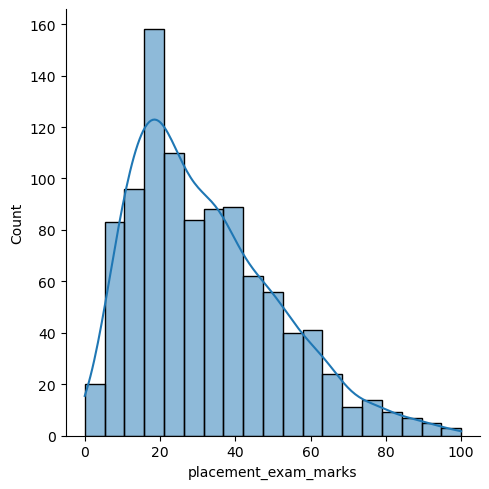

In [10]:
plt.figure(figsize=(6,4))
# sns.distplot(df['cgpa'])  -->>>> its old new is histplot
sns.histplot(df['cgpa'],kde=True)

sns.displot(df['placement_exam_marks'],kde=True)

plt.show()

In [11]:
#You above diagram only cgpa is normally distributed

df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [12]:
print("mean value of cgpa",df['cgpa'].mean())
print("std value of cgpa",df['cgpa'].std())
print("min value of cgpa",df['cgpa'].min())
print("max value of cgpa",df['cgpa'].max())

mean value of cgpa 6.96124
std value of cgpa 0.6158978751323894
min value of cgpa 4.89
max value of cgpa 9.12


In [13]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean()+3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean()-3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [15]:
# Finding the outliers
df[(df['cgpa']<5.11) | (df['cgpa']>8.80)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

In [16]:
new_df=df[(df['cgpa']<8.80) & (df['cgpa']>5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [21]:
# Apporach 2

# Calculating the Z score

df['cgpa_zscore']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [22]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [23]:
df[df['cgpa_zscore']>3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [24]:
df[df['cgpa_zscore']<-3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [28]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]


,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [29]:
# Trimming
new_df=df[(df['cgpa_zscore']<3)  & (df['cgpa_zscore']>-3)]

In [30]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


In [31]:
# capping
upper_limit=df['cgpa'].mean() +3*df['cgpa'].std()
lower_limit=df['cgpa'].mean() -3*df['cgpa'].std()

In [32]:
lower_limit

np.float64(5.113546374602832)

In [33]:
upper_limit

np.float64(8.808933625397168)

In [35]:
df['cgpa']=np.where(df['cgpa']>upper_limit,upper_limit,
np.where(df['cgpa']<lower_limit,lower_limit,df['cgpa']))

In [36]:
df.shape

(1000, 4)

In [37]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64